In [26]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import seaborn
import numpy, scipy, IPython.display as ipd
from scipy.fft import fft, ifft

In [27]:
import urllib
filename = 'drum.mp3'
x, sr = librosa.load(filename)
ipd.Audio(x, rate=sr)

/home/harsh/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [28]:
X = fft(x)
X_mag = numpy.absolute(X)
f = numpy.linspace(0, sr, len(X_mag))

(0.0, 1000.0)

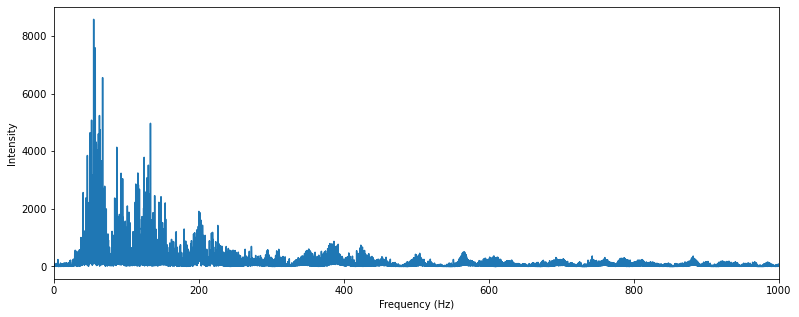

In [29]:
#Plot the spectrum:

plt.figure(figsize=(13, 5))
a = plt.plot(f, X_mag) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity')
plt.xlim([0,1000])


In [30]:
#librosa.stft computes a STFT. 
#We provide it a frame size, i.e. the size of the FFT, and a hop length, i.e. the frame increment:
hop_length = 512
n_fft = 2048
X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)

In [31]:
hop_length_sec = float(hop_length)/sr #hop length in sec
n_fft_sec = float(n_fft)/sr #frame size in seconds

print(hop_length_sec,n_fft_sec)

0.023219954648526078 0.09287981859410431


# Spectogram

Creating a spectrogram using the FFT is a digital process. Digitally sampled data, in the time domain, is broken up into chunks, which usually overlap, and Fourier transformed to calculate the magnitude of the frequency spectrum for each chunk. Each chunk then corresponds to a vertical line in the image; a measurement of magnitude versus frequency for a specific moment in time (the midpoint of the chunk). These spectrums or time plots are then "laid side by side" to form the image or a three-dimensional surface or slightly overlapped in various ways, i.e. windowing.This process essentially corresponds to computing the squared magnitude of the short-time Fourier transform (STFT) of the signal s(t) 

In [32]:
S = librosa.amplitude_to_db(abs(X))

Plotting Spectogram for a key played on a piano

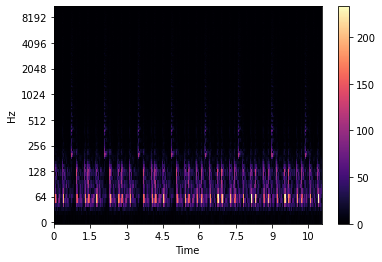

In [33]:
#Let's plot a magnitude spectrogram where the colorbar is a linear function of the 
#spectrogram values, i.e. just plot the raw values.
Xmag = abs(X)
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

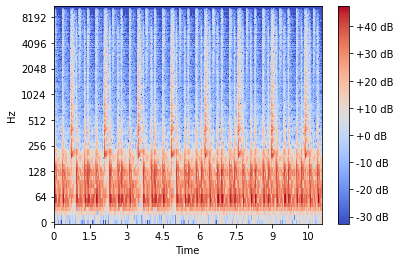

In [34]:
#Now let's plot a magnitude spectrogram where the colorbar is a logarithmic function of the
#spectrogram values. We are mainly familiar with the log scale while calculating intensity.
Xdb = librosa.amplitude_to_db(Xmag)
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

Certain observation facts we can clearly see from the spectogram of a note played on keyboard

1)high intensity of harmonics

2)decreasing intensity for higher frequencies with time

# Tempo and Beats


/tmp/ipykernel_8054/3328683063.py:2: FutureWarning: Pass y=[-1.3555218e-04  9.8804558e-05 -4.4863336e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_env = librosa.onset.onset_strength(x, sr=sr, hop_length=hop_length, n_fft=2048)


Text(0.5, 1.0, 'Novelty Function')

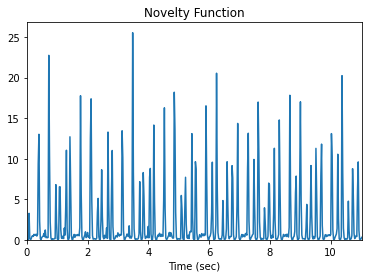

In [35]:
#computing the novelty function
onset_env = librosa.onset.onset_strength(x, sr=sr, hop_length=hop_length, n_fft=2048)
#plotting the onset envelope
frames = range(len(onset_env))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(t, onset_env)
plt.xlim(0, t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

# Estimating Global Tempo
We will use librosa.beat.tempo to estimate the global tempo in an audio file.

In [36]:
tempo = librosa.beat.tempo(x, sr=sr)
print(tempo)

[172.265625]


/tmp/ipykernel_8054/1757904990.py:1: FutureWarning: Pass y=[-1.3555218e-04  9.8804558e-05 -4.4863336e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(x, sr=sr)


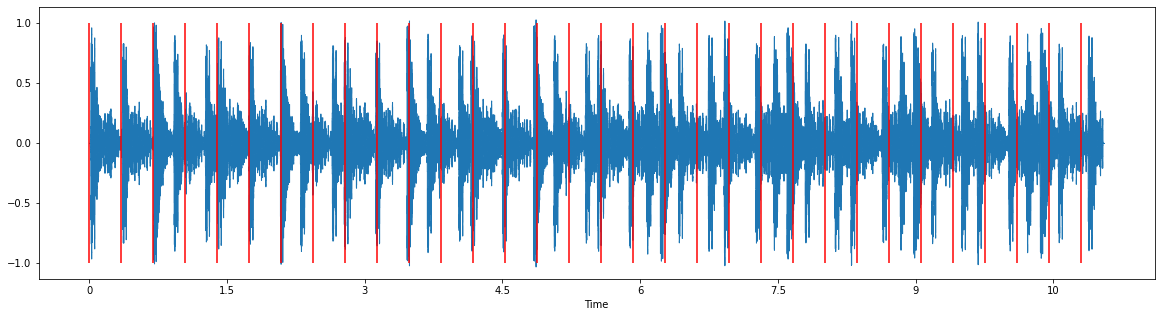

In [37]:
T = len(x)/float(sr)
plt.figure(figsize=(20, 5))
seconds_per_beat = 60.0/tempo[0]
beat_times = numpy.arange(0, T, seconds_per_beat)
librosa.display.waveshow(x)
plt.vlines(beat_times, -1, 1, color='r')

refrences- 

1)https://www.kaggle.com/code/ashkhagan/audio-signal-processing-librosa/notebook

2)https://musicinformationretrieval.com/tempo_estimation.html